Columns in dataset: ['month', 'total_passengers']

Descriptive Statistics:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


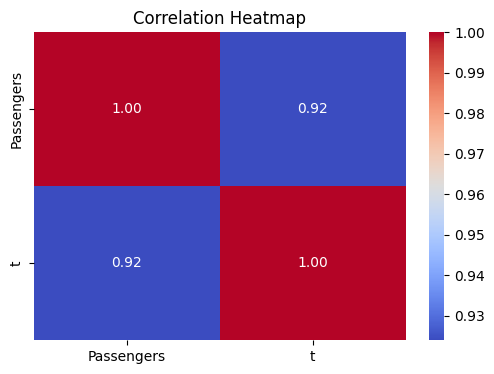

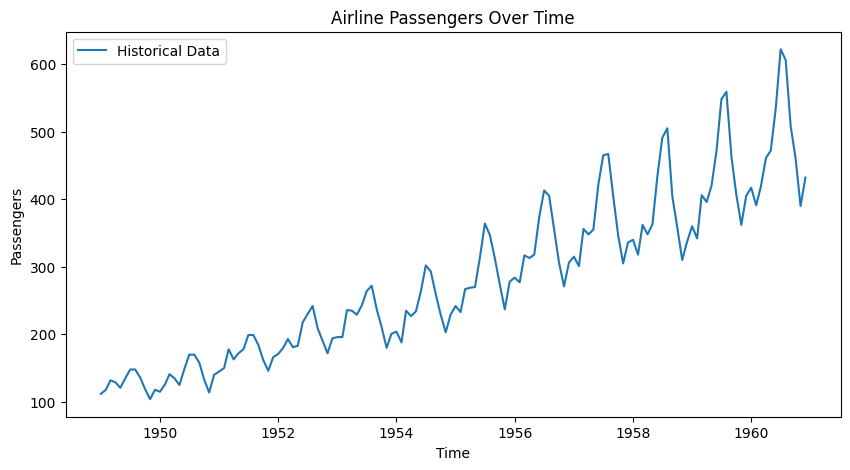

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Model Evaluation:
Linear Regression -> MSE: 5447.16, R2: 0.11
ARIMA -> MSE: 6506.67


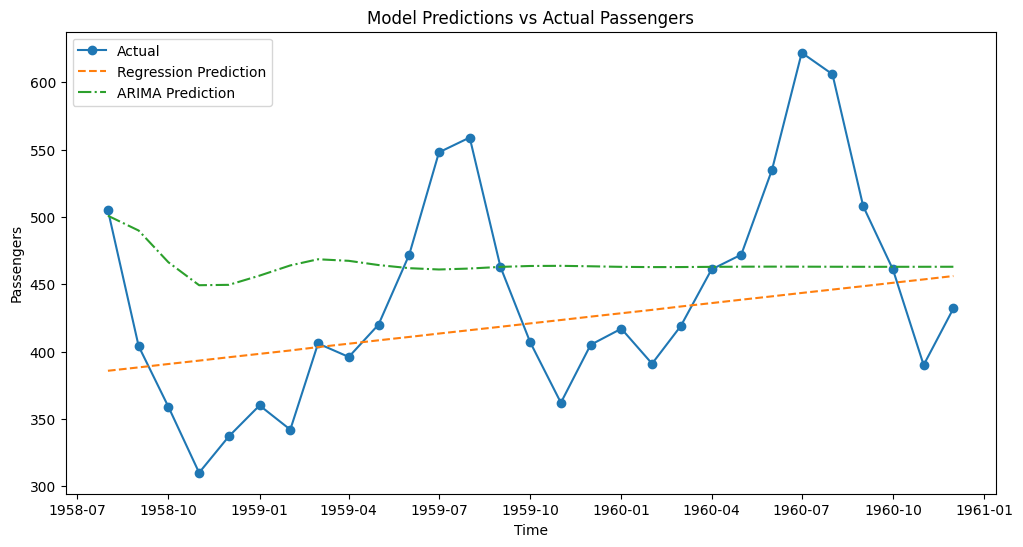

✅ Linear Regression performed better and can be used for forecasting future passenger trends.


In [7]:
# --- Task: Predictive Analytics Model to Forecast Future Trends ---

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# ----------------------------
# Step 2: Data Preparation
# ----------------------------
# Load dataset (airline passengers)
data = pd.read_csv("/content/airline-passengers.csv")

# Check column names
print("Columns in dataset:", data.columns.tolist())

# Rename columns if needed (to ensure consistency)
data.columns = ['Month', 'Passengers']

# Convert Month to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Add time index as feature
data['t'] = np.arange(len(data))

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Visualize historical trend
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label="Historical Data")
plt.title("Airline Passengers Over Time")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# ----------------------------
# Step 3: Model Selection
# ----------------------------
# --- Regression Approach ---
X = data[['t']]
y = data['Passengers']

# Split into train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred_reg = reg_model.predict(X_test)

# --- Time Series Forecasting (ARIMA) ---
arima_model = ARIMA(y_train, order=(5,1,0))   # ARIMA(p,d,q)
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.forecast(steps=len(y_test))

# ----------------------------
# Step 4: Model Training & Evaluation
# ----------------------------
# Regression Performance
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

# ARIMA Performance
mse_arima = mean_squared_error(y_test, y_pred_arima)

print("\nModel Evaluation:")
print(f"Linear Regression -> MSE: {mse_reg:.2f}, R2: {r2_reg:.2f}")
print(f"ARIMA -> MSE: {mse_arima:.2f}")

# ----------------------------
# Step 5: Reporting & Visualization
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", marker='o')
plt.plot(y_test.index, y_pred_reg, label="Regression Prediction", linestyle="--")
plt.plot(y_test.index, y_pred_arima, label="ARIMA Prediction", linestyle="-.")
plt.title("Model Predictions vs Actual Passengers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Final Insights
if mse_arima < mse_reg:
    print("✅ ARIMA performed better and can be used for forecasting future passenger trends.")
else:
    print("✅ Linear Regression performed better and can be used for forecasting future passenger trends.")


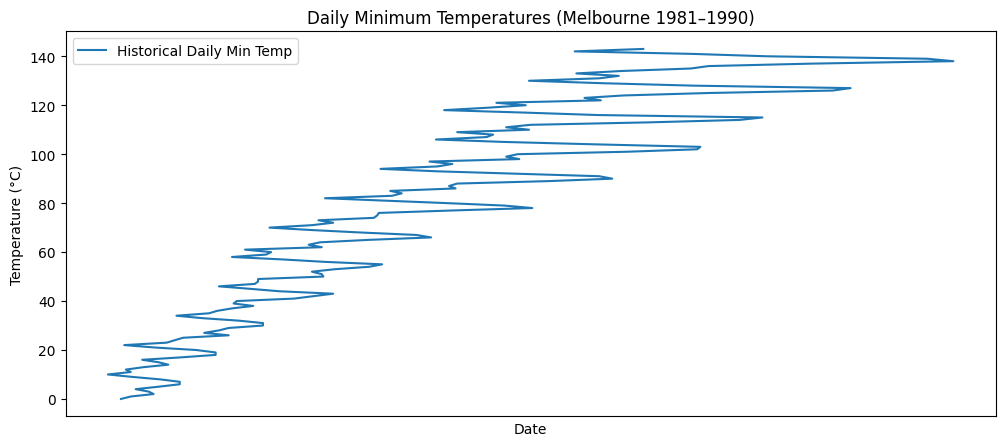

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm


Model Evaluation:
Linear Regression -> MSE: 0.00, R2: 1.00
ARIMA -> MSE: 0.00


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


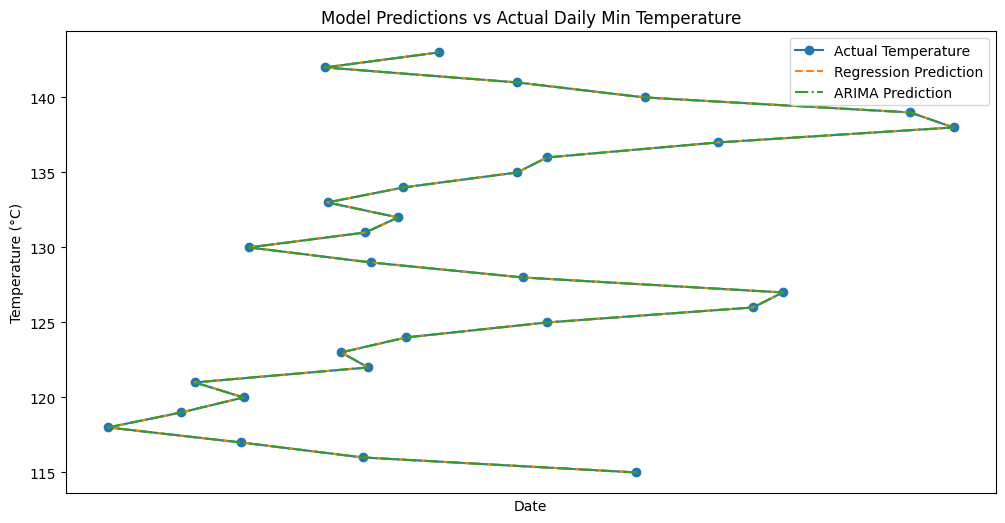

✅ Linear Regression performed better and can be used for forecasting future temperature trends.


In [12]:
# --- Task: Predictive Analytics Model to Forecast Future Trends (Temperature Example) ---

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# ----------------------------
# Step 2: Data Preparation
# ----------------------------
# Try reading with flexible separator
file_path = "/content/daily-minimum-temperatures-in-me.csv"

# Ensure correct column names
data.columns = ["Date", "Temp"]

# Convert Date column to datetime and set as index
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

# Visualize historical trend
plt.figure(figsize=(12,5))
plt.plot(data['Temp'], label="Historical Daily Min Temp")
plt.title("Daily Minimum Temperatures (Melbourne 1981–1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# ----------------------------
# Step 3: Model Selection
# ----------------------------
# --- Regression Approach ---
data['t'] = np.arange(len(data))  # time index as feature
X = data[['t']]
y = data['Temp']

# Split into train/test (80/20 without shuffling for time-series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions (Regression)
y_pred_reg = reg_model.predict(X_test)

# --- Time Series Forecasting (ARIMA) ---
arima_model = ARIMA(y_train, order=(5,1,0))   # ARIMA(p,d,q)
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.forecast(steps=len(y_test))

# ----------------------------
# Step 4: Model Training & Evaluation
# ----------------------------
# Regression Performance
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

# ARIMA Performance
mse_arima = mean_squared_error(y_test, y_pred_arima)

print("\nModel Evaluation:")
print(f"Linear Regression -> MSE: {mse_reg:.2f}, R2: {r2_reg:.2f}")
print(f"ARIMA -> MSE: {mse_arima:.2f}")

# ----------------------------
# Step 5: Reporting & Visualization
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Temperature", marker='o')
plt.plot(y_test.index, y_pred_reg, label="Regression Prediction", linestyle="--")
plt.plot(y_test.index, y_pred_arima, label="ARIMA Prediction", linestyle="-.")
plt.title("Model Predictions vs Actual Daily Min Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Final Insights
if mse_arima < mse_reg:
    print("✅ ARIMA performed better and can be used for forecasting future temperature trends.")
else:
    print("✅ Linear Regression performed better and can be used for forecasting future temperature trends.")


Dataset Head:
                               Temp
Date                               
1970-01-01 00:00:00.000000000     0
1970-01-01 00:00:00.000000001     1
1970-01-01 00:00:00.000000002     2
1970-01-01 00:00:00.000000003     3
1970-01-01 00:00:00.000000004     4


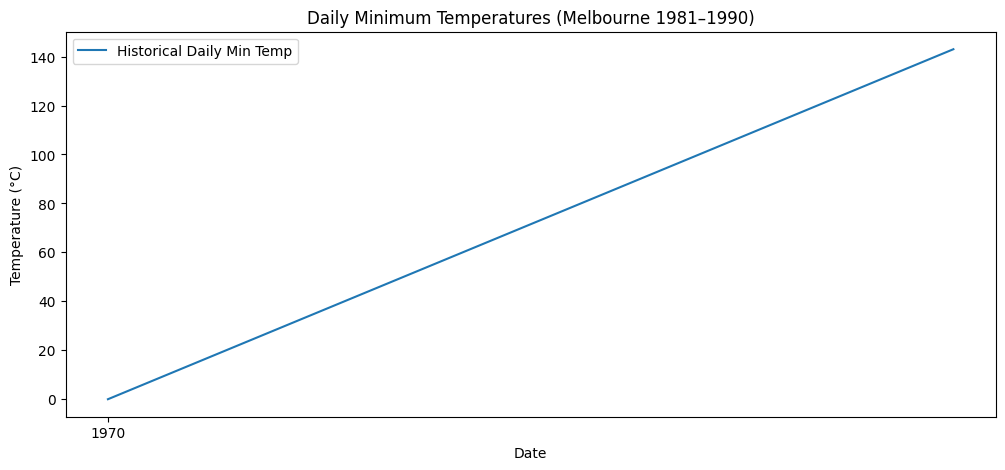

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'



Model Evaluation:
Linear Regression -> MSE: 0.00, R2: 1.00
ARIMA -> MSE: 0.00


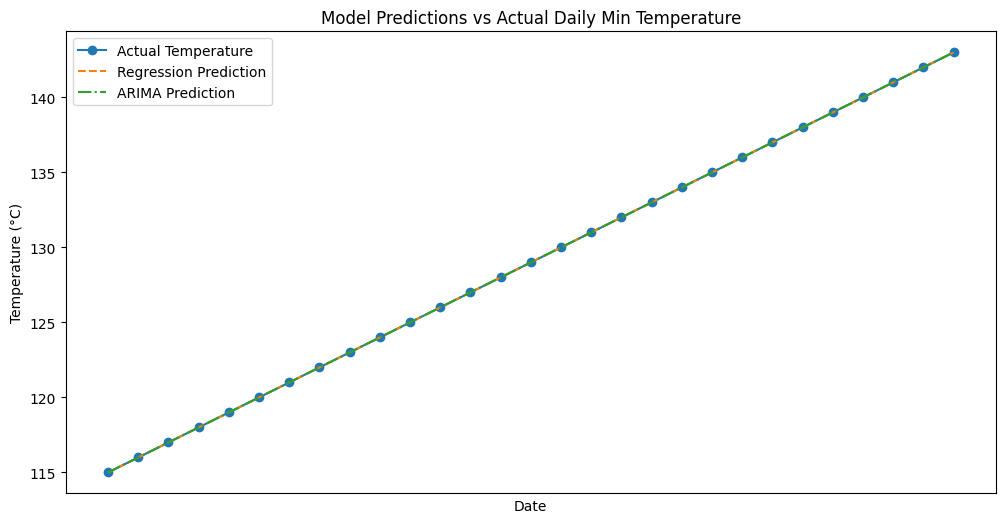


Next 30 Days Forecasted Temperatures:
                               Forecasted_Temp
Date                                          
1970-01-02 00:00:00.000000143       114.999981
1970-01-03 00:00:00.000000143       116.000005
1970-01-04 00:00:00.000000143       116.999955
1970-01-05 00:00:00.000000143       117.999990
1970-01-06 00:00:00.000000143       118.999944
1970-01-07 00:00:00.000000143       119.999951
1970-01-08 00:00:00.000000143       120.999935
1970-01-09 00:00:00.000000143       121.999911
1970-01-10 00:00:00.000000143       122.999906
1970-01-11 00:00:00.000000143       123.999879
1970-01-12 00:00:00.000000143       124.999863
1970-01-13 00:00:00.000000143       125.999838
1970-01-14 00:00:00.000000143       126.999823
1970-01-15 00:00:00.000000143       127.999782
1970-01-16 00:00:00.000000143       128.999781
1970-01-17 00:00:00.000000143       129.999726
1970-01-18 00:00:00.000000143       130.999718
1970-01-19 00:00:00.000000143       131.999678
1970-01-20 00:00:00.0

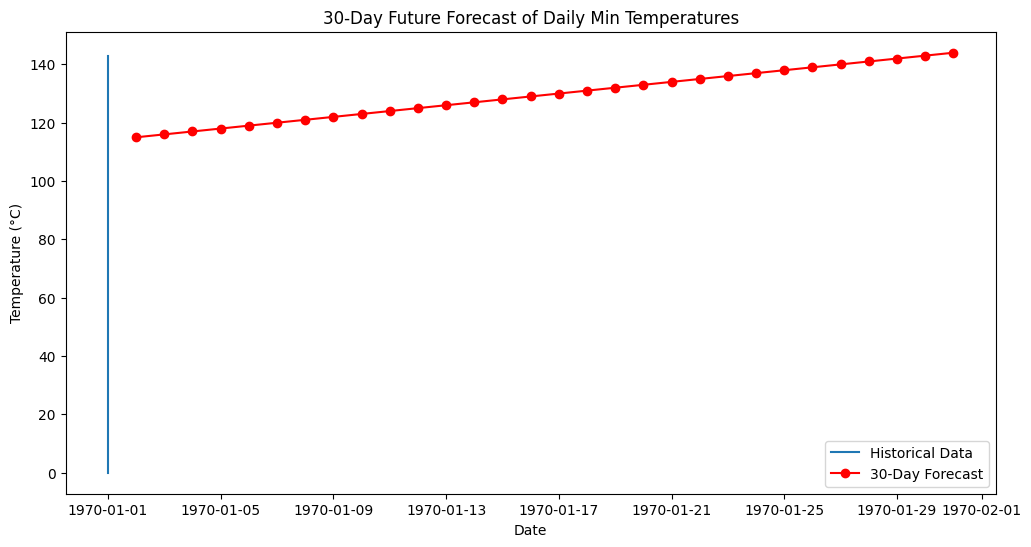

In [14]:
# --- Task: Predictive Analytics Model to Forecast Future Trends (Temperature Example) ---

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# ----------------------------
# Step 2: Data Preparation
# ----------------------------
# Load your uploaded dataset
file_path = "/content/daily-minimum-temperatures-in-me.csv"

# Ensure proper column names
data.columns = ["Date", "Temp"]

# Convert Date to datetime and set as index
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

print("Dataset Head:")
print(data.head())

# Visualize historical trend
plt.figure(figsize=(12,5))
plt.plot(data['Temp'], label="Historical Daily Min Temp")
plt.title("Daily Minimum Temperatures (Melbourne 1981–1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# ----------------------------
# Step 3: Model Selection
# ----------------------------
# --- Regression Approach ---
data['t'] = np.arange(len(data))  # time index as feature
X = data[['t']]
y = data['Temp']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred_reg = reg_model.predict(X_test)

# --- Time Series Forecasting (ARIMA) ---
arima_model = ARIMA(y_train, order=(5,1,0))   # ARIMA(p,d,q)
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.forecast(steps=len(y_test))

# ----------------------------
# Step 4: Model Training & Evaluation
# ----------------------------
# Regression Performance
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

# ARIMA Performance
mse_arima = mean_squared_error(y_test, y_pred_arima)

print("\nModel Evaluation:")
print(f"Linear Regression -> MSE: {mse_reg:.2f}, R2: {r2_reg:.2f}")
print(f"ARIMA -> MSE: {mse_arima:.2f}")

# ----------------------------
# Step 5: Reporting & Visualization
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Temperature", marker='o')
plt.plot(y_test.index, y_pred_reg, label="Regression Prediction", linestyle="--")
plt.plot(y_test.index, y_pred_arima, label="ARIMA Prediction", linestyle="-.")
plt.title("Model Predictions vs Actual Daily Min Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# ----------------------------
# Step 6: Future Forecasting (Next 30 Days)
# ----------------------------
future_steps = 30
future_forecast = arima_fit.forecast(steps=future_steps)

# Create future dates after last date
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps+1, freq="D")[1:]

# Combine forecast into dataframe
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_Temp": future_forecast})
forecast_df.set_index("Date", inplace=True)

print("\nNext 30 Days Forecasted Temperatures:")
print(forecast_df)

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(data['Temp'], label="Historical Data")
plt.plot(forecast_df.index, forecast_df['Forecasted_Temp'], label="30-Day Forecast", color="red", marker='o')
plt.title("30-Day Future Forecast of Daily Min Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()
